# Investigate Data Sets


The dataset that is being analysed in this project is the Titanic Data that was presented by Udacity sourced in Kaggle (https://www.kaggle.com/c/titanic/data).
In this project, there are several questions to be answered:
1. What are likely the factors of the survived passengers? (What age or sex? What class? Family brought? Cabin/Deck?)
2. What is the weathiest area at the time? (class by embarked)
3. How old are typically people that afford a first class at the time? (Age by class)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('data/titanic-data.csv')

# to undestand the data, we have to see the headers and repective values.
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Data Cleaning

### Data Type

Make sure all numerical attributes have numeric values

In [2]:
def parse_maybe_int(data):
    if data == "":
        return None
    else:
        return int(data)
    
def parse_maybe_float(data):
    if data == "":
        return None
    else:
        return float(data)
    
def parse_embark_name(data):
    if data == "C":
        return "Cherbourg"
    elif data == "Q":
        return "Queenstown"
    elif data == "S":
        return "Southampton"
    else:
        return None
    
titanic_df.Age = titanic_df.Age.apply(parse_maybe_float)
titanic_df.Fare = titanic_df.Fare.apply(parse_maybe_float)
titanic_df.Parch = titanic_df.Parch.apply(parse_maybe_int)
titanic_df.SibSp = titanic_df.SibSp.apply(parse_maybe_int)
titanic_df.Embarked = titanic_df.Embarked.apply(parse_embark_name)

### Null Data

In [3]:
#Numerical data description
titanic_df[['Age','Fare','Parch','SibSp', 'Pclass', 'Survived']].describe()

Age        Fare       Parch       SibSp      Pclass    Survived
count  714.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.381594    0.523008    2.308642    0.383838
std     14.526497   49.693429    0.806057    1.102743    0.836071    0.486592
min      0.420000    0.000000    0.000000    0.000000    1.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000    2.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000    3.000000    0.000000
75%     38.000000   31.000000    0.000000    1.000000    3.000000    1.000000
max     80.000000  512.329200    6.000000    8.000000    3.000000    1.000000

As seen in the data, there are some missing data such as in Age, this missing data can bend the statistic results; Thus, it is important to find pattern of these missing data. Below are the plots of all columns respectively to the missing Age data.

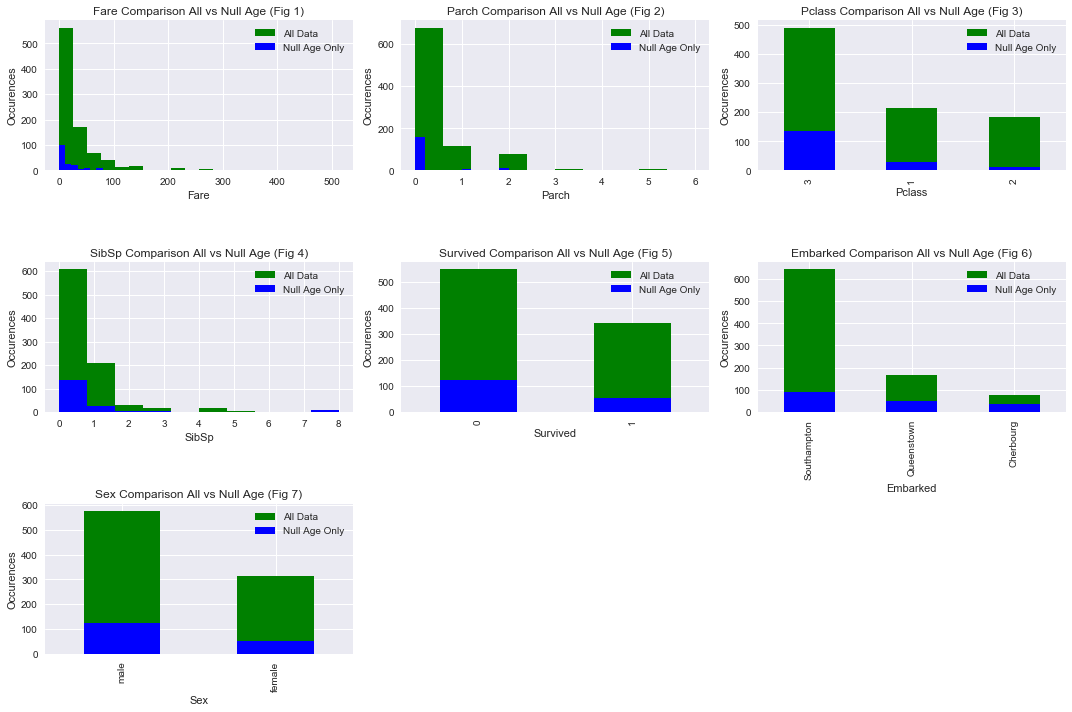

In [4]:
#data of null Age
f, ((ax1, ax2, ax3), (ax4, ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10))

f.delaxes(ax8)
f.delaxes(ax9)

null_age = titanic_df[titanic_df['Age'].isnull()]

titanic_df['Fare'].hist(ax=ax1, label='y', color='green', bins=20)
titanic_df[titanic_df['Age'].isnull()]['Fare'].hist(ax=ax1,label='x', color='blue',bins=20)
ax1.set_title('Fare Comparison All vs Null Age (Fig 1)')
ax1.set_ylabel('Occurences')
ax1.set_xlabel('Fare')
ax1.legend(['All Data','Null Age Only'])

titanic_df['Parch'].hist(ax=ax2, color='green')
titanic_df[titanic_df['Age'].isnull()]['Parch'].hist(ax=ax2, color='blue')
ax2.set_title('Parch Comparison All vs Null Age (Fig 2)')
ax2.set_ylabel('Occurences')
ax2.set_xlabel('Parch')
ax2.legend(['All Data','Null Age Only'])
           
titanic_df['Pclass'].value_counts().plot(kind='bar', ax=ax3, color='green')
titanic_df[titanic_df['Age'].isnull()]['Pclass'].value_counts().plot(kind='bar', ax=ax3,  color='blue')
ax3.set_title('Pclass Comparison All vs Null Age (Fig 3)')
ax3.set_ylabel('Occurences')
ax3.set_xlabel('Pclass')
ax3.legend(['All Data','Null Age Only'])

titanic_df['SibSp'].hist(ax=ax4, color='green')
titanic_df[titanic_df['Age'].isnull()]['SibSp'].hist(ax=ax4,  color='blue')
ax4.set_title('SibSp Comparison All vs Null Age (Fig 4)')
ax4.set_ylabel('Occurences')
ax4.set_xlabel('SibSp')
ax4.legend(['All Data','Null Age Only'])

titanic_df['Survived'].value_counts().plot(kind='bar', ax=ax5, color='green')
titanic_df[titanic_df['Age'].isnull()]['Survived'].value_counts().plot(kind='bar', ax=ax5,   color='blue')
ax5.set_title('Survived Comparison All vs Null Age (Fig 5)')
ax5.set_ylabel('Occurences')
ax5.set_xlabel('Survived')
ax5.legend(['All Data','Null Age Only'])

titanic_df['Embarked'].value_counts().plot(kind='bar', ax=ax6, color='green')
titanic_df[titanic_df['Age'].isnull()]['Embarked'].value_counts().plot(kind='bar', ax=ax6,  color='blue')
ax6.set_title('Embarked Comparison All vs Null Age (Fig 6)')
ax6.set_ylabel('Occurences')
ax6.set_xlabel('Embarked')
ax6.legend(['All Data','Null Age Only'])

titanic_df['Sex'].value_counts().plot(kind='bar', ax=ax7, color='green')
titanic_df[titanic_df['Age'].isnull()]['Sex'].value_counts().plot(kind='bar', ax=ax7,  color='blue')
ax7.set_title('Sex Comparison All vs Null Age (Fig 7)')
ax7.set_ylabel('Occurences')
ax7.set_xlabel('Sex')
ax7.legend(['All Data','Null Age Only'])

plt.tight_layout()
plt.show()


As shown above, it seems there is significant less data proportion in class 2 and 1 and higher data proportion in class 3 in Fig 3. In a same fashion, Fig 6 also shows that for "Cherbourg" it is around 50% that have null Age data. So, if the data ignored/deleted, **it will cause imbalance in classes population distribution**.

In [5]:
# Categorical data description
titanic_df[['Sex','Embarked']].describe()

Sex     Embarked
count    891          889
unique     2            3
top     male  Southampton
freq     577          644

It seems Embarked data has null values, so, lets check it.

In [6]:
titanic_df[titanic_df['Embarked'].isnull()]    

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28     None  
829  female  62.0      0      0  113572  80.0   B28     None

Based on here https://www.geni.com/people/Am%C3%A9lie-Rose-Icard/6000000015829615380,
passengerId 62 was a maid to passenger 830 and departed from Southhampton. **Thus, their data should be completed**

In [7]:
titanic_df.loc[61,'Embarked']  = 'Southampton'
titanic_df.loc[829,'Embarked']  = 'Southampton'

In [8]:
titanic_df[['Sex','Embarked']].describe()

Sex     Embarked
count    891          891
unique     2            3
top     male  Southampton
freq     577          646

### Outlier

In [9]:
def outlier_by_class(label):
    IQR =  titanic_df.groupby('Pclass').quantile(0.75)[label]-titanic_df.groupby('Pclass').quantile(0.25)[label]
    outlier_max = titanic_df.groupby('Pclass').quantile(0.75)[label]+1.5*IQR
    outlier_min = titanic_df.groupby('Pclass').quantile(0.25)[label]-1.5*IQR
    return outlier_max, outlier_min

def outlier(label):
    IQR =  titanic_df[label].quantile(0.75)-titanic_df[label].quantile(0.25)
    outlier_max = titanic_df[label].quantile(0.75)+1.5*IQR
    outlier_min = titanic_df[label].quantile(0.25)-1.5*IQR
    return outlier_max, outlier_min

#### Fare

In [10]:
fare_outlier_max, fare_outlier_min = outlier('Fare')

print(fare_outlier_max)
print(fare_outlier_min)

fare_outlier_max_c, fare_outlier_min_c = outlier_by_class('Fare')

print(fare_outlier_max_c)
print(fare_outlier_min_c)

65.6344
-26.724
Pclass
1    187.364075
2     45.500000
3     27.125000
Name: Fare, dtype: float64
Pclass
1   -62.940125
2    -6.500000
3    -3.875000
Name: Fare, dtype: float64


#### Age

In [11]:
age_outlier_max, age_outlier_min = outlier('Age')

print(age_outlier_max)
print(age_outlier_min)

age_outlier_max_c, age_outlier_min_c = outlier_by_class('Age')

print(age_outlier_max_c)
print(age_outlier_min_c)

64.8125
-6.6875
Pclass
1    82.0
2    55.5
3    53.0
Name: Age, dtype: float64
Pclass
1   -6.0
2    3.5
3   -3.0
Name: Age, dtype: float64


Based on the describe data in the previous section, there is no outlier in Age Column but there are outliers in Fare column. Let's check who are these people

In [12]:
titanic_df[(titanic_df['Fare']>fare_outlier_max_c[1]) & (titanic_df['Pclass']==1)]

PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
118                           Baxter, Mr. Quigg Edmond    male  24.0      0   
258                                   Ward, Miss. Anna  female  35.0      0   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   
311                         Ryerson, Miss. Emily Borie  female  18.0      2   
341                     Fortune, Miss. Alice Elizabeth  female  24.0      3   
377                          Widener, Mr. Harry Elkins    male  27.0      0   
380                              Bidois, Miss. Rosalie  female  42.0      0   
438                                  Fortune, Mr. Mark    male  64.0      1   
527                                 Farthing, Mr. John    male   NaN      0   
557                                Robbins, Mr. Victor    male   NaN      0   
679                 Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
689                  Madill, Miss. Georgette Alexandra  female  15.0      0   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  female  18.0      1   
716                      Endres, Miss. Caroline Louise  female  38.0      0   
730                      Allen, Miss. Elisabeth Walton  female  29.0      0   
737                             Lesurer, Mr. Gustave J    male  35.0      0   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.0      2   
779  Robert, Mrs. Edward Scott (Elisabeth Walton Mc...  female  43.0      0   

     Parch    Ticket      Fare            Cabin     Embarked  
27       2     19950  263.0000      C23 C25 C27  Southampton  
88       2     19950  263.0000      C23 C25 C27  Southampton  
118      1  PC 17558  247.5208          B58 B60    Cherbourg  
258      0  PC 17755  512.3292              NaN    Cherbourg  
299      1  PC 17558  247.5208          B58 B60    Cherbourg  
311      2  PC 17608  262.3750  B57 B59 B63 B66    Cherbourg  
341      2     19950  263.0000      C23 C25 C27  Southampton  
377      2    113503  211.5000              C82    Cherbourg  
380      0  PC 17757  227.5250              NaN    Cherbourg  
438      4     19950  263.0000      C23 C25 C27  Southampton  
527      0  PC 17483  221.7792              C95  Southampton  
557      0  PC 17757  227.5250              NaN    Cherbourg  
679      1  PC 17755  512.3292      B51 B53 B55    Cherbourg  
689      1     24160  211.3375               B5  Southampton  
700      0  PC 17757  227.5250          C62 C64    Cherbourg  
716      0  PC 17757  227.5250              C45    Cherbourg  
730      0     24160  211.3375               B5  Southampton  
737      0  PC 17755  512.3292             B101    Cherbourg  
742      2  PC 17608  262.3750  B57 B59 B63 B66    Cherbourg  
779      1     24160  211.3375               B3  Southampton

In [13]:
titanic_df_no_outlier = titanic_df[~((titanic_df['Fare']>fare_outlier_max_c[1]) & (titanic_df['Pclass']==1))]


In [14]:
#Comparison on data before and after outlier removal
print(titanic_df.describe())
print(titanic_df_no_outlier.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId    Survived      Pclass         Age       SibSp  \
count   871

In [15]:
#Comparison on data before and after outlier removal
print(titanic_df[['Sex','Embarked']].describe())
print(titanic_df_no_outlier[['Sex','Embarked']].describe())

         Sex     Embarked
count    891          891
unique     2            3
top     male  Southampton
freq     577          646
         Sex     Embarked
count    871          871
unique     2            3
top     male  Southampton
freq     569          638


As an example visualisation of data difference, Pclass comparsion figure provided as follows.

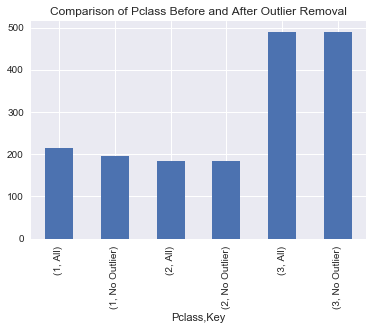

In [16]:
com1 = titanic_df_no_outlier['Pclass'].copy().to_frame()
com2 = titanic_df['Pclass'].copy().to_frame()


com1['Key'] = "No Outlier"
com2['Key'] = "All"


DF = pd.concat([com1,com2])
DF_group_by = DF.groupby("Pclass").Key.value_counts()
DF_group_by.plot(kind='bar', y='Occurences', title="Comparison of Pclass Before and After Outlier Removal")


As seen before, there is no significant changes after the data cleaning, but mean and std at Fare column seems changed a bit.

## Data Analysis

### 1. What are likely the factors of the survived passengers? (What age or sex? What class? Family brought?)

In [17]:
#Find standard form of all column
a = (titanic_df_no_outlier[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]-titanic_df_no_outlier.mean())/titanic_df_no_outlier.std()
#Add Family brought columns
a['Family'] = a['SibSp'] + a['Parch']

In [18]:
a.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.014291 -0.032224  0.035218 -0.049230  0.006580   
Survived       -0.014291  1.000000 -0.329285 -0.079434 -0.040547  0.080408   
Pclass         -0.032224 -0.329285  1.000000 -0.379773  0.094324  0.051138   
Age             0.035218 -0.079434 -0.379773  1.000000 -0.307324 -0.203113   
SibSp          -0.049230 -0.040547  0.094324 -0.307324  1.000000  0.409380   
Parch           0.006580  0.080408  0.051138 -0.203113  0.409380  1.000000   
Fare           -0.003510  0.298671 -0.653248  0.137939  0.246085  0.230427   
Family         -0.025403  0.023742  0.086641 -0.299735  0.839458  0.839458   

                 Fare    Family  
PassengerId -0.003510 -0.025403  
Survived     0.298671  0.023742  
Pclass      -0.653248  0.086641  
Age          0.137939 -0.299735  
SibSp        0.246085  0.839458  
Parch        0.230427  0.839458  
Fare         1.000000  0.283821  
Family       0.283821  1.000000

In [19]:
#Percentage of survival per class(fixed this, nice techniques bro :D)
titanic_df_no_outlier.groupby(['Pclass'])['Survived'].mean()*100
# (titanic_df_no_outlier.loc[titanic_df_no_outlier['Survived']==1].groupby('Pclass').sum()['Survived']/titanic_df_no_outlier.groupby('Pclass').count()['PassengerId'])*100

Pclass
1    62.244898
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [20]:
#Percentage of survival per sex(fixed this, nice techniques bro :D)
titanic_df_no_outlier.groupby(['Sex'])['Survived'].mean()*100
# (titanic_df_no_outlier.loc[titanic_df_no_outlier['Survived']==1].groupby('Sex').sum()['Survived']/titanic_df_no_outlier.groupby('Sex').count()['PassengerId'])*100

Sex
female    73.178808
male      18.804921
Name: Survived, dtype: float64

Based on the table above, it seems there is no strong correlation between Survived column and the other column. As seen [here](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/), Pclass have medium positive correlation with Survived (the table shows "-", but the class meaning is inverted, e.g. class 3 as the bottom level, 1 as the top level). In addition, Fare also shows weak positive correlation with the Survived. This is make sense since Fare and Pclass almost have strong positive correlation. Unfortunately, number of family brought seems does not have correlation with the data.

##### Conclusion

Based on the data above the first class tend to be mostly survived may be because they were proritised to be in the life boat, as well as the female passenger. **However, further research can enhance this finding as the connection only determined by correlation, that may not imply causation.**

### 2. What is the weathiest area at the time? (class by embarked)

Age                                                         \
             count       mean        std    min    25%   50%    75%   max   
Embarked                                                                    
Cherbourg     63.0  39.206349  14.552639  16.00  25.50  39.0  50.00  71.0   
Queenstown     2.0  38.500000   7.778175  33.00  35.75  38.5  41.25  44.0   
Southampton  103.0  38.868155  15.180788   0.92  29.50  38.0  48.50  80.0   

              Fare            ...  SibSp      Survived                      \
             count       mean ...    75%  max    count      mean       std   
Embarked                      ...                                            
Cherbourg     73.0  71.543778 ...   1.00  1.0     73.0  0.684932  0.467758   
Queenstown     2.0  90.000000 ...   1.75  2.0      2.0  0.500000  0.707107   
Southampton  121.0  59.409469 ...   1.00  2.0    121.0  0.586777  0.494460   

                                        
             min   25%  50%   75%  max  
Embarked                                
Cherbourg    0.0  0.00  1.0  1.00  1.0  
Queenstown   0.0  0.25  0.5  0.75  1.0  
Southampton  0.0  0.00  1.0  1.00  1.0  

[3 rows x 56 columns]

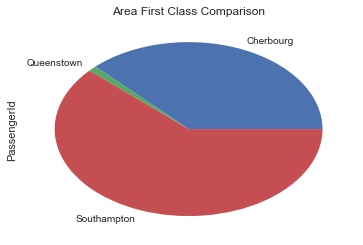

In [21]:
titanic_df_no_outlier.loc[titanic_df_no_outlier['Pclass']==1].groupby('Embarked').count()['PassengerId'].plot(kind='pie', title='Area First Class Comparison')
titanic_df_no_outlier.loc[titanic_df_no_outlier['Pclass']==1].groupby('Embarked').describe()

Assumed wealthiness is measured by the number of first class passenger. Southampton had the largest proportion of wealthy passenger.
##### Conclusion
Thus, it can be assumed that Southampton was the weathiest area at the time. 

count    168.000000
mean      38.990595
std       14.824789
min        0.920000
25%       28.000000
50%       38.000000
75%       49.250000
max       80.000000
Name: Age, dtype: float64


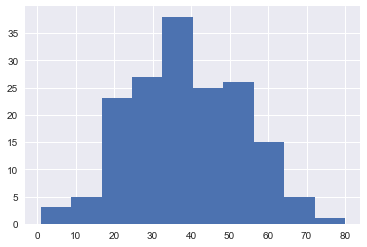

In [22]:
print(titanic_df_no_outlier.loc[titanic_df_no_outlier['Pclass']==1]['Age'].describe())
titanic_df_no_outlier.loc[titanic_df_no_outlier['Pclass']==1]['Age'].hist()

Based on the data above the mean is 38 and based on the histogram the range is around 34-41 is the highest occurences. In the other hand, 0-10 and 70-80 are the lowest occurences. 
##### Conclusion
It can be roughly assumed that since the data is normally distributed, that is 68% of the first class passenger were Gen Y and Gen X at the time.
